In [9]:
import numpy as np
import nugridpy.astronomy as ast
import nugridpy.utils as u
import nugridpy.mesa as ms
from matplotlib import gridspec
from matplotlib.pyplot import *
%matplotlib nbagg

240 in profiles.index file ...
Found and load nearest profile for cycle 29350
reading /data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS_N2b/log147.data ...
 reading ...100% 

Closing profile tool ...


<IPython.core.display.Javascript object>


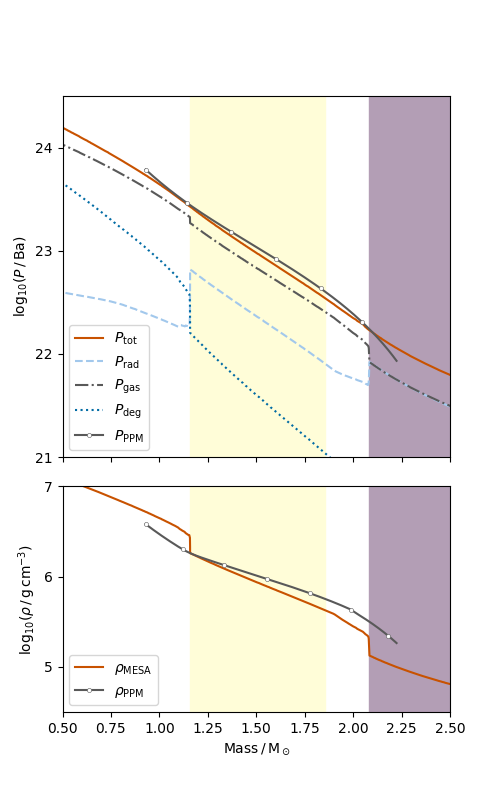

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in log10


In [13]:
p = ms.mesa_profile('/data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/LOGS_N2b', 29350)

m  = p.get('mass')
mu = p.get('mu')
T  = 10.**p.get('logT')
Pppm = np.load( 'P_ppmsetup.npy' ) * 1.e19 # convert to barye
Mrppm = np.load( 'Mr_ppmsetup.npy' ) * 5.025e-07 # convert to Msun
rhoppm = np.load( 'rho_ppmsetup.npy' ) * 1.e3 # convert to g/cc

f = figure(figsize=(5, 8)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[1.6, 1]) 
ax1 = subplot(gs[0])
ax2 = subplot(gs[1], sharex=ax1)
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0.1)
setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

axes(ax1)
# plot simulation boundaries
rad1 = 3.0 # Mm
rad2 = 9.8 # Mm
rad  = 10. ** p.get('logR') * ast.rsun_cm / 1.e8
#print rad
idx1 = np.abs(rad - rad1).argmin()
idx2 = np.abs(rad - rad2).argmin()
m1   = m[idx1]
m2   = m[idx2]
#print m1, m2
cb = u.colourblind

# plot conv zone boundaries
rlconv = 1.1593
ruconv = 1.8553
fill_between( [ rlconv, ruconv ], 0, 100, color='#fffdd8' ) #'f3f3df' )

rlconv = 2.0824
ruconv = 2.50
fill_between( [ rlconv, ruconv ], 0, 100, color='#b39eb5' )

plot(m,p.get('logP'),
    label='$P_\mathrm{tot}$',
    color=cb(8),
    linestyle='-')

prad=ast.Prad(T,mu) # of course, the mu is not really used
plot(m,np.log10(prad),
    label='$P_\mathrm{rad}$',
    color=cb(0),
    linestyle='--')

rho= 10.**p.get('logRho')
pideal = ast.Pgas(rho,T,mu)
plot(m,np.log10(pideal),
    label='$P_\mathrm{gas}$',
    color=cb(4),
    linestyle='-.')

# use the difference:
pdeg = 10.** p.get('logP') - prad - pideal
plot(m,np.log10(pdeg),
    label='$P_\mathrm{deg}$',
    color=cb(5),
    linestyle=':')

plot( Mrppm[1:], np.log10(Pppm[1:]), linestyle='-', \
      marker='.', markevery=0.1, label='$P_\mathrm{PPM}$', \
      color=cb(4), mfc='w', mec=cb(4), mew=0.4 )

xlim(0.5,2.5)
#xlim(0.8,2.3)
ylim(20.5,24.5)


ylabel('$\log_{10}(P\,/\,\mathrm{Ba})$')

#legend(loc=(0.75,0.6))
legend(loc='lower left')

ax=gca()
ax.yaxis.set_ticks([21,22,23,24,25])
draw()
ylim(21,24.5)

axes(ax2)

plot(m,p.get('logRho'),
#plot(m,10.**p.get('logRho'),
    label='$\\rho_\mathrm{MESA}$',
    color=cb(8),
    linestyle='-')

plot( Mrppm[1:], np.log10(rhoppm[1:]), linestyle='-', \
#plot( Mrppm[1:], rhoppm[1:], linestyle='-', \
      marker='.', markevery=0.1,
      color=cb(4), mfc='w', mec=cb(4), mew=0.4,
      label='$\\rho_\mathrm{PPM}$' )

rlconv = 1.1593
ruconv = 1.8553
fill_between( [ rlconv, ruconv ], 0, 100, color='#fffdd8' ) #'#f3f3df' )

rlconv = 2.0824
ruconv = 2.50
fill_between( [ rlconv, ruconv ], 0, 100, color='#b39eb5' )

#legend(loc=(0.75,0.6))
legend(loc='lower left')
ylim(4.5,7)
yticks(np.linspace(5,7,3))
ylabel('$\log_{10}(\\rho\,/\,\mathrm{g\,cm}^{-3})$')
xlabel('$\mathrm{Mass\,/\,M}_\odot$')
